<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5505MachineLearning/blob/main/Shaik_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc

In [3]:
# Importing the dataset and storing in a data frame
br_cancer_df = pd.read_csv('/content/data-breastCancer.csv')
br_cancer_df.dropna()
br_cancer_df.shape
br_cancer_df.head(10) # displaying the top 10 records

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
# Summary of statastics for the entire dataset
br_cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Deleting the Null values for running algorithm
br_cancer_df.apply(lambda x: x.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Cleaning the dataset by removing the Unnamed column values

br_cancer_df.drop('Unnamed: 32',axis=1, inplace=True)
br_cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#‘Diagnosis’ column has M and B, which is converted to 1 and 0 respectively for algorithm consistency
br_cancer_df['diagnosis'] = np.where(br_cancer_df['diagnosis']=='M', 1, 0)

In [8]:
br_cancer_df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
# The dataset should be equally distributed so that there should not be any scope for class imbalance
# Creating independent variable b y dropping the diagnosis column
ind_df = br_cancer_df.drop('diagnosis', axis=1)
ind_df.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [10]:
# Creating Depending variable by taking the 'diagnosis' column
dep_df = br_cancer_df['diagnosis']
dep_df.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

In [11]:
#Splitting the dataset into 80:20 with 80% of the training data by considering dependent and independent variables created
X_train, X_test, y_train, y_test = train_test_split (ind_df, dep_df,train_size = 0.8)
X_train.shape

(455, 31)

In [12]:
X_test.shape

(114, 31)

In [13]:
#Building RandomForestClassifier using scikit-learn without any max_depeth and iterations
rf_model = RandomForestClassifier(random_state=42)
rf_model

RandomForestClassifier(random_state=42)

In [15]:
# Training the model to fetch predicted Y value
rf_model.fit(X_train, y_train)
yVal_pred = rf_model.predict(X_test)

In [16]:
# Calculating the accuracy score from the test and predicted y values
accuracyScore = accuracy_score(y_test, yVal_pred)
print("The accuracy score calculated : ",accuracyScore)

The accuracy score calculated :  0.956140350877193


In [17]:
rf_model.score(X_test, y_test)

0.956140350877193

Text(0.5, 1.0, 'Actual vs Predicted')

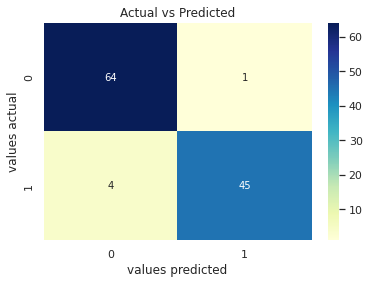

In [18]:
# Confusion matrix is created by plotting actual values vs predicted values
matrix_of_conf = confusion_matrix(y_test, yVal_pred)
sns.heatmap(matrix_of_conf, annot = True, cmap="YlGnBu")
plt.ylabel ('values actual')
plt.xlabel ('values predicted')
plt.title('Actual vs Predicted')

In [20]:
#K-fold cross validation method is used, by considering the cross validation value as 10.
score_val = cross_val_score(rf_model, X_train, y_train, cv = 10)

print("Score of initial model : ",score_val) # Returns the score of the intial model developed
print(" Mean score: ",score_val.mean()) # Returns mean score

Score of initial model :  [0.93478261 0.91304348 0.95652174 0.93478261 0.95652174 0.97777778
 0.97777778 0.97777778 0.93333333 1.        ]
 Mean score:  0.956231884057971


In [21]:
#Fine tuned model with the fit parameters like estimator_value, maxFeatures, depth,min_samples_split, min_samples_leaf, bootstrap 

estimators = [int(item) for item in np.linspace(start = 100, stop = 1000, num = 10, endpoint = True)]
max_features = ['auto', 'sqrt', 'log2']
depth = [int(item) for item in np.linspace(start = 3, stop = 36, num=33, endpoint = True)]
min_split = [5, 10, 15]
min_leaf = [2, 4, 6]
bootstrap = ['True']


In [23]:
# Created RandomGridSerach with the created parameters
randomGridSearch = {'n_estimators':estimators, 
               'max_features': max_features, 
               'max_depth': depth, 
               'min_samples_split': min_split,
               'min_samples_leaf': min_leaf,
               'bootstrap': bootstrap}
print("Printing RandomGridSearch vales : ",randomGridSearch)

Printing RandomGridSearch vales :  {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [2, 4, 6], 'bootstrap': ['True']}


In [24]:
#using RandomizedSearchCV the model is trained for the best score.
Model_tuned = RandomForestClassifier(random_state=42)
randomizedSearchCV = RandomizedSearchCV (estimator=Model_tuned, param_distributions  = randomGridSearch, random_state=42, cv = 10, n_iter=50)
randomizedSearchCV.fit(X_train, y_train)
randomizedSearchCV.best_params_

{'bootstrap': 'True',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [28]:
#After training the model 50 iterations are achieved, with best fit values the model is trained.
tuned_RF_model = RandomForestClassifier(n_estimators = 300,
                                  min_samples_split = 5, 
                                  min_samples_leaf = 2, 
                                  max_features = 'sqrt', 
                                  max_depth = 12, 
                                  bootstrap = True, 
                                  random_state=42)
tuned_valid_score = cross_val_score (tuned_RF_model, X_train, y_train, cv = 10)
print(tuned_valid_score)
print(tuned_valid_score.mean())

[0.95652174 0.93478261 0.95652174 0.91304348 0.97826087 0.97777778
 0.97777778 0.97777778 0.93333333 1.        ]
0.9605797101449275


In [29]:
# Building model with fine tuned parameters
tuned_RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)

In [30]:
# Predicted Y val after fine tuning the model with best fit paramters
predicted_val = tuned_RF_model.predict(X_test)
predicted_val

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [31]:
test_pred= tuned_RF_model.predict_proba(X_test)
test_pred[:5]

array([[0.99111111, 0.00888889],
       [0.995     , 0.005     ],
       [0.98555556, 0.01444444],
       [0.29095635, 0.70904365],
       [0.93843651, 0.06156349]])

In [33]:
# Calculated the accuracy score with fine tuning model and observed the same score
accuracy = accuracy_score(y_test, predicted_val)
print(accuracy)

0.956140350877193


In [34]:
tuned_RF_model.score(X_test, y_test)

0.956140350877193

Text(0.5, 1.0, 'Actual values vs predicted values')

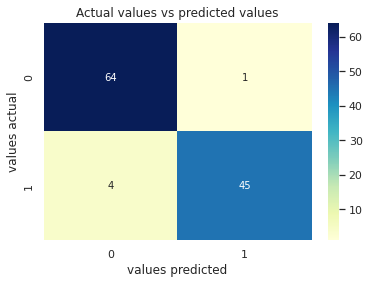

In [35]:

# Confusion matrix is created by plotting actual values vs predicted values after fine tuning model with best fit parameters
matrix_of_conf = confusion_matrix(y_test, predicted_val)
sns.heatmap(matrix_of_conf, annot = True, cmap="YlGnBu")
plt.xlabel ('values predicted')
plt.ylabel ('values actual')
plt.title('Actual values vs predicted values')

In [36]:
#Using a receiver operating characteristic (ROC) curve the false positive and true positive rates across different thresholds are calculated
#Predicted value calculation
test_pred_prob = test_pred[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve (y_test,test_pred_prob, pos_label = 1)

In [ ]:
auc_rf = auc(fpr, tpr)
auc_rf

0.9980347199475926

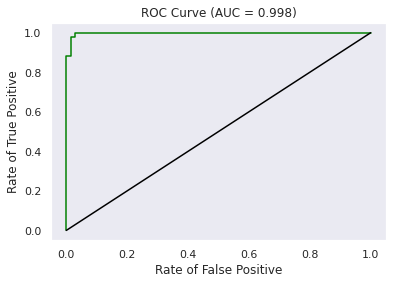

In [ ]:
# We plot the ROC graph by accommodating AUC. The AUC is a measurement that differentiates between the model's prediction power for cancer patients and non cancer patients. 
#This value closer to 1 determines the fact that the model is able to differentiate the cancer and non cancer patient target classes.
plt.plot(fpr, tpr, color='green')
plt.plot([0,1], '00')
plt.xlabel('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title ("ROC Curve (AUC = {:.3f})".format(auc_rf))
plt.grid()
plt.show()

In [ ]:
train_pred_prob= tuned_Randomforest_model.predict_proba(X_train)
train_pred_prob[:5]

array([[0.00277778, 0.99722222],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.94614418, 0.05385582],
       [0.99833333, 0.00166667]])

In [ ]:
fpr1, tpr1, threshold1 = roc_curve (y_train,train_pred_prob[:,1], pos_label = 1)

In [ ]:
auc_rf1 = auc(fpr1, tpr1)
auc_rf1

0.9998758637811893

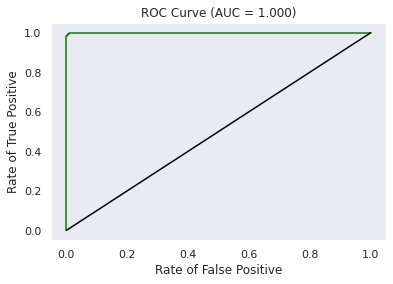

In [ ]:
# Graph is plotted for visulisation purpose
plt.plot(fpr1, tpr1, color='green')
plt.plot([0,1], '00')
plt.xlabel('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title ("ROC Curve (AUC = {:.3f})".format(auc_rf1))
plt.grid()
plt.show()